In [8]:
import sys
sys.path.insert(0, r"C:\Users\pedro\edge-rppg-health")  # ensure project root is first on sys.path
import importlib
importlib.invalidate_caches()  
import pandas as pd

In [2]:
from IppgSignalObtainer import IppgSignalObtainer
import matplotlib.pyplot as plt
#from Tools.ParametersCalculator import ParametersCalculator

In [4]:
path = "videos_iPPG_paula/2024-11-28 at 10.06.20.mp4"   
rois = IppgSignalObtainer.extractSeriesRoiRGBFromVideo(path, 30, 30, 0, True, True, False, False)

forehead ========================================================================
left_cheek ========================================================================
right_cheek ========================================================================


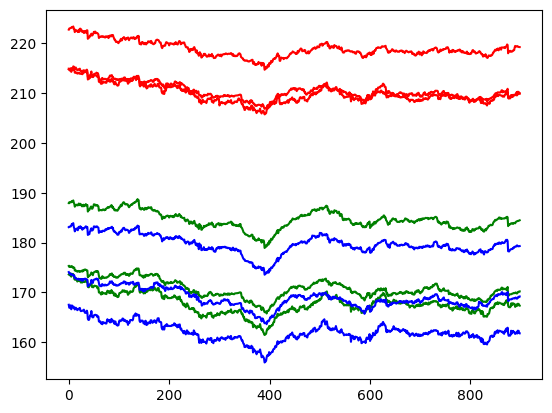

In [16]:
for roi in rois:
    print(f"{roi} ========================================================================")
    for channel in rois[roi]:
        plt.plot(rois[roi][channel], color = channel)
    #plt.show()

In [ ]:
pd.read_csv("results_roi_hr.csv", header=None)

,0,1,2,3,4,5,6
0,file,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek
1,20241203_152904.mp4,right_cheek,98.4375,95.0,24.6875,3.59375,3.4375
2,20241203_111907.mp4,left_cheek,91.40625,52.0,25.34375,39.40625,2.78125
3,2024-11-28 at 10.06.20.mp4,forehead,84.375,85.0,0.625,0.625,14.6875
4,2024-11-28 at 10.10.37.mp4,left_cheek,77.34375,95.0,3.4375,17.65625,10.625
5,2024-11-28 at 10.16.37.mp4,right_cheek,119.53125,68.0,2.3125,30.4375,51.53125
6,2024-11-28 at 10.32.50.mp4,right_cheek,70.3125,75.0,4.6875,4.6875,4.6875
7,2024-11-28 at 10.34.52.mp4,left_cheek,70.3125,69.0,1.3125,1.3125,8.34375
8,2024-11-28 at 11.54.15.mp4,left_cheek,70.3125,90.0,19.6875,19.6875,1.40625
9,2024-11-28 at 16.13.38.mp4,left_cheek,91.40625,68.0,4.71875,23.40625,2.3125


## Analisis de los graficos de los periodogramas: 

En los videos del motorola G72, NO se ve el pico cercano a 1Hz que se ve por ej en el S24

## Analisis seleccion automatica de ROI

En muchos casos puede verse que se consiguieron bajos errores para alguna de las ROIs en especifico, mostrando la importancia de la seleccion dinamica de las mismas. Sin embargo, en la mayor parte de los casos el metodo de seleccion basado unicamente en la energia no dio resultados satisfactorios, dligiendo ROIs con errores muy altos por sobre ROIs con errores bajos.

En base a esto se procedera a hacer dos cosas:
1- Probar distintos metodos y ver la diferencia
2- Probar distintos criterios para la seleccion de ROIs, como por ejemplo el SNR, indices de calidad, o la combinacion de este con el.
3- Testear en videos obtenidos con webcam (sin post procesamiento) y ver si el problema radica en el postprocesamientod e los celulares


## Probamos distintos metodos y rois para señales obtenidas con smarphone (dataset paula) y con webcam (UBFC y dataset google drive)

### Dataset Paula

In [7]:
# Load results_all_methods_paula.csv and separate by method
df_all_methods = pd.read_csv("results_all_methods_paula.csv")

# Function to find the ROI with minimum error
def find_min_error_roi(row):
    error_cols = {
        'forehead': row['error_for_roi_forehead'],
        'left_cheek': row['error_for_roi_left_cheek'],
        'right_cheek': row['error_for_roi_right_cheek']
    }
    min_roi = min(error_cols, key=error_cols.get)
    return min_roi

# Add column to check if best_roi matches the ROI with lowest error
df_all_methods['min_error_roi'] = df_all_methods.apply(find_min_error_roi, axis=1)
df_all_methods['best_roi_is_correct'] = df_all_methods['best_roi'] == df_all_methods['min_error_roi']
df_all_methods['✓'] = df_all_methods['best_roi_is_correct'].map({True: '✓', False: ''})

# Separate dataframe by method
methods = df_all_methods['method'].unique()
dfs_by_method = {}

for method in methods:
    dfs_by_method[method] = df_all_methods[df_all_methods['method'] == method].copy()
    print(f"\n=== {method.upper()} Method ({len(dfs_by_method[method])} rows) ===")
    display(dfs_by_method[method])
    
# The separate dataframes are stored in dfs_by_method dictionary
# Access them like: dfs_by_method['pos'], dfs_by_method['chrom'], etc.


=== POS Method (19 rows) ===


,method,file,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
0,pos,20241203_152904.mp4,right_cheek,98.43750,95.0,3.43750,24.68750,3.43750,forehead,False,
4,pos,20241203_111907.mp4,right_cheek,91.40625,52.0,25.34375,39.40625,39.40625,forehead,False,
8,pos,2024-11-28 at 10.06.20.mp4,forehead,84.37500,85.0,0.62500,0.62500,14.68750,forehead,True,✓
12,pos,2024-11-28 at 10.10.37.mp4,left_cheek,84.37500,95.0,3.43750,10.62500,3.43750,forehead,False,
16,pos,2024-11-28 at 10.16.37.mp4,right_cheek,77.34375,68.0,2.31250,2.31250,9.34375,forehead,False,
20,pos,2024-11-28 at 10.32.50.mp4,left_cheek,70.31250,75.0,2.34375,4.68750,4.68750,forehead,False,
24,pos,2024-11-28 at 10.34.52.mp4,left_cheek,70.31250,69.0,1.31250,1.31250,1.31250,forehead,False,
28,pos,2024-11-28 at 11.54.15.mp4,left_cheek,70.31250,90.0,1.40625,19.68750,1.40625,forehead,False,
32,pos,2024-11-28 at 16.13.38.mp4,left_cheek,91.40625,68.0,2.31250,23.40625,2.31250,forehead,False,
36,pos,2024-11-28 at 16.19.35.mp4,left_cheek,84.37500,56.0,28.37500,28.37500,14.31250,right_cheek,False,



=== CHROM Method (19 rows) ===


,method,file,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
1,chrom,20241203_152904.mp4,right_cheek,63.28125,95.0,52.81250,52.81250,31.71875,right_cheek,True,✓
5,chrom,20241203_111907.mp4,left_cheek,49.21875,52.0,9.81250,2.78125,2.78125,left_cheek,True,✓
9,chrom,2024-11-28 at 10.06.20.mp4,left_cheek,56.25000,85.0,0.62500,28.75000,42.81250,forehead,False,
13,chrom,2024-11-28 at 10.10.37.mp4,left_cheek,84.37500,95.0,45.78125,10.62500,3.43750,right_cheek,False,
17,chrom,2024-11-28 at 10.16.37.mp4,right_cheek,77.34375,68.0,4.71875,9.34375,9.34375,forehead,False,
21,chrom,2024-11-28 at 10.32.50.mp4,right_cheek,70.31250,75.0,2.34375,2.34375,4.68750,forehead,False,
25,chrom,2024-11-28 at 10.34.52.mp4,left_cheek,70.31250,69.0,1.31250,1.31250,12.75000,forehead,False,
29,chrom,2024-11-28 at 11.54.15.mp4,right_cheek,42.18750,90.0,26.71875,19.68750,47.81250,left_cheek,False,
33,chrom,2024-11-28 at 16.13.38.mp4,left_cheek,63.28125,68.0,2.31250,4.71875,2.31250,forehead,False,
37,chrom,2024-11-28 at 16.19.35.mp4,right_cheek,70.31250,56.0,28.37500,21.34375,14.31250,right_cheek,True,✓



=== ICA Method (19 rows) ===


,method,file,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
2,ica,20241203_152904.mp4,forehead,77.34375,95.0,17.65625,24.68750,17.65625,forehead,True,✓
6,ica,20241203_111907.mp4,forehead,42.18750,52.0,9.81250,11.28125,2.78125,right_cheek,False,
10,ica,2024-11-28 at 10.06.20.mp4,left_cheek,77.34375,85.0,7.65625,7.65625,7.65625,forehead,False,
14,ica,2024-11-28 at 10.10.37.mp4,forehead,63.28125,95.0,31.71875,52.81250,31.71875,forehead,True,✓
18,ica,2024-11-28 at 10.16.37.mp4,forehead,70.31250,68.0,2.31250,9.34375,2.31250,forehead,True,✓
22,ica,2024-11-28 at 10.32.50.mp4,left_cheek,70.31250,75.0,32.81250,4.68750,2.34375,right_cheek,False,
26,ica,2024-11-28 at 10.34.52.mp4,right_cheek,77.34375,69.0,8.34375,5.71875,8.34375,left_cheek,False,
30,ica,2024-11-28 at 11.54.15.mp4,forehead,56.25000,90.0,33.75000,33.75000,40.78125,forehead,True,✓
34,ica,2024-11-28 at 16.13.38.mp4,left_cheek,49.21875,68.0,18.78125,18.78125,25.81250,forehead,False,
38,ica,2024-11-28 at 16.19.35.mp4,forehead,56.25000,56.0,0.25000,7.28125,21.34375,forehead,True,✓



=== GREEN Method (19 rows) ===


,method,file,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
3,green,20241203_152904.mp4,forehead,77.34375,95.0,17.65625,3.59375,3.43750,right_cheek,False,
7,green,20241203_111907.mp4,left_cheek,70.31250,52.0,18.31250,18.31250,11.28125,right_cheek,False,
11,green,2024-11-28 at 10.06.20.mp4,left_cheek,84.37500,85.0,0.62500,0.62500,0.62500,forehead,False,
15,green,2024-11-28 at 10.10.37.mp4,left_cheek,105.46875,95.0,3.43750,10.46875,3.59375,forehead,False,
19,green,2024-11-28 at 10.16.37.mp4,left_cheek,70.31250,68.0,2.31250,2.31250,2.31250,forehead,False,
23,green,2024-11-28 at 10.32.50.mp4,left_cheek,77.34375,75.0,4.68750,2.34375,2.34375,left_cheek,True,✓
27,green,2024-11-28 at 10.34.52.mp4,forehead,70.31250,69.0,1.31250,1.31250,15.37500,forehead,True,✓
31,green,2024-11-28 at 11.54.15.mp4,forehead,119.53125,90.0,29.53125,15.46875,5.62500,right_cheek,False,
35,green,2024-11-28 at 16.13.38.mp4,right_cheek,133.59375,68.0,2.31250,51.53125,65.59375,forehead,False,
39,green,2024-11-28 at 16.19.35.mp4,forehead,84.37500,56.0,28.37500,35.40625,28.37500,forehead,True,✓


### Dataset google drive

In [6]:
# Load results_processed_data_analysis.csv and separate by method
df_processed = pd.read_csv("results_processed_data_analysis.csv")

# Function to find the ROI with minimum error
def find_min_error_roi(row):
    error_cols = {
        'forehead': row['error_for_roi_forehead'],
        'left_cheek': row['error_for_roi_left_cheek'],
        'right_cheek': row['error_for_roi_right_cheek']
    }
    min_roi = min(error_cols, key=error_cols.get)
    return min_roi

# Add column to check if best_roi matches the ROI with lowest error
df_processed['min_error_roi'] = df_processed.apply(find_min_error_roi, axis=1)
df_processed['best_roi_is_correct'] = df_processed['best_roi'] == df_processed['min_error_roi']
df_processed['✓'] = df_processed['best_roi_is_correct'].map({True: '✓', False: ''})

# Separate dataframe by method
methods = df_processed['method'].unique()
dfs_by_method = {}

for method in methods:
    dfs_by_method[method] = df_processed[df_processed['method'] == method].copy()
    print(f"\n=== {method.upper()} Method ({len(dfs_by_method[method])} rows) ===")
    display(dfs_by_method[method])
    
# The separate dataframes are stored in dfs_by_method dictionary
# Access them like: dfs_by_method['pos'], dfs_by_method['chrom'], etc.




=== POS Method (16 rows) ===


,method,file,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
0,pos,P1H1,left_cheek,126.56250,110.273847,16.288653,16.288653,16.288653,forehead,False,
4,pos,P1LC1,right_cheek,105.46875,66.545171,10.798579,3.263921,38.923579,left_cheek,False,
8,pos,P1LC2,right_cheek,63.28125,64.933048,1.651798,1.651798,1.651798,forehead,False,
12,pos,P1LC3,left_cheek,56.25000,63.978432,7.728432,7.728432,7.728432,forehead,False,
16,pos,P1LC4,left_cheek,63.28125,63.888044,0.606794,0.606794,0.606794,forehead,False,
20,pos,P1LC5,left_cheek,56.25000,62.059267,5.809267,5.809267,5.809267,forehead,False,
24,pos,P1LC6,left_cheek,63.28125,62.613119,6.363119,0.668131,6.363119,left_cheek,True,✓
28,pos,P1LC7,right_cheek,63.28125,58.036621,5.244629,5.244629,5.244629,forehead,False,
32,pos,P1M1,right_cheek,63.28125,65.572676,2.291426,9.322676,2.291426,forehead,False,
36,pos,P1M2,left_cheek,63.28125,63.692389,55.838861,0.411139,0.411139,left_cheek,True,✓



=== CHROM Method (16 rows) ===


,method,file,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
1,chrom,P1H1,left_cheek,126.56250,110.273847,16.288653,16.288653,16.288653,forehead,False,
5,chrom,P1LC1,right_cheek,63.28125,66.545171,3.263921,10.295171,3.263921,forehead,False,
9,chrom,P1LC2,right_cheek,56.25000,64.933048,82.723202,8.683048,8.683048,left_cheek,False,
13,chrom,P1LC3,left_cheek,56.25000,63.978432,7.728432,7.728432,7.728432,forehead,False,
17,chrom,P1LC4,right_cheek,63.28125,63.888044,0.606794,0.606794,0.606794,forehead,False,
21,chrom,P1LC5,left_cheek,56.25000,62.059267,5.809267,5.809267,5.809267,forehead,False,
25,chrom,P1LC6,left_cheek,56.25000,62.613119,0.668131,6.363119,6.363119,forehead,False,
29,chrom,P1LC7,right_cheek,147.65625,58.036621,89.619629,5.244629,89.619629,left_cheek,False,
33,chrom,P1M1,right_cheek,63.28125,65.572676,2.291426,23.385176,2.291426,forehead,False,
37,chrom,P1M2,left_cheek,63.28125,63.692389,55.838861,0.411139,0.411139,left_cheek,True,✓



=== ICA Method (16 rows) ===


,method,file,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
2,ica,P1H1,left_cheek,126.56250,110.273847,16.288653,16.288653,16.288653,forehead,False,
6,ica,P1LC1,forehead,63.28125,66.545171,3.263921,24.861079,3.263921,forehead,True,✓
10,ica,P1LC2,right_cheek,63.28125,64.933048,1.651798,1.651798,1.651798,forehead,False,
14,ica,P1LC3,left_cheek,56.25000,63.978432,7.728432,7.728432,20.396568,forehead,False,
18,ica,P1LC4,right_cheek,63.28125,63.888044,0.606794,55.643206,0.606794,forehead,False,
22,ica,P1LC5,right_cheek,56.25000,62.059267,5.809267,5.809267,5.809267,forehead,False,
26,ica,P1LC6,left_cheek,56.25000,62.613119,0.668131,6.363119,14.730631,forehead,False,
30,ica,P1LC7,left_cheek,91.40625,58.036621,5.244629,33.369629,5.244629,forehead,False,
34,ica,P1M1,forehead,56.25000,65.572676,9.322676,23.385176,23.385176,forehead,True,✓
38,ica,P1M2,forehead,63.28125,63.692389,0.411139,0.411139,0.411139,forehead,True,✓



=== GREEN Method (16 rows) ===


,method,file,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
3,green,P1H1,right_cheek,126.56250,110.273847,16.288653,16.288653,16.288653,forehead,False,
7,green,P1LC1,left_cheek,63.28125,66.545171,3.263921,3.263921,60.017329,forehead,False,
11,green,P1LC2,right_cheek,63.28125,64.933048,1.651798,1.651798,1.651798,forehead,False,
15,green,P1LC3,left_cheek,56.25000,63.978432,7.728432,7.728432,7.728432,forehead,False,
19,green,P1LC4,right_cheek,63.28125,63.888044,0.606794,0.606794,0.606794,forehead,False,
23,green,P1LC5,left_cheek,56.25000,62.059267,5.809267,5.809267,5.809267,forehead,False,
27,green,P1LC6,right_cheek,56.25000,62.613119,6.363119,6.363119,6.363119,forehead,False,
31,green,P1LC7,left_cheek,63.28125,58.036621,5.244629,5.244629,5.244629,forehead,False,
35,green,P1M1,left_cheek,49.21875,65.572676,2.291426,16.353926,18.802324,forehead,False,
39,green,P1M2,forehead,63.28125,63.692389,0.411139,0.411139,0.411139,forehead,True,✓


### Dataset UBFC

In [9]:
# Load results_ubfc_comparison.csv and separate by method
df_ubfc = pd.read_csv("results_ubfc_comparison.csv")

# Function to find the ROI with minimum error
def find_min_error_roi_ubfc(row):
    error_cols = {}
    # Get all error columns dynamically (they might be forehead, left_cheek, right_cheek, etc.)
    for col in row.index:
        if col.startswith('error_for_roi_'):
            roi_name = col.replace('error_for_roi_', '')
            if pd.notna(row[col]):
                error_cols[roi_name] = row[col]
    if len(error_cols) == 0:
        return None
    min_roi = min(error_cols, key=error_cols.get)
    return min_roi

# Add column to check if best_roi matches the ROI with lowest error
df_ubfc['min_error_roi'] = df_ubfc.apply(find_min_error_roi_ubfc, axis=1)
df_ubfc['best_roi_is_correct'] = df_ubfc['best_roi'] == df_ubfc['min_error_roi']
df_ubfc['✓'] = df_ubfc['best_roi_is_correct'].map({True: '✓', False: ''})

# Separate dataframe by method
methods = df_ubfc['method'].unique()
dfs_by_method_ubfc = {}

for method in methods:
    dfs_by_method_ubfc[method] = df_ubfc[df_ubfc['method'] == method].copy()
    print(f"\n=== {method.upper()} Method ({len(dfs_by_method_ubfc[method])} rows) ===")
    display(dfs_by_method_ubfc[method])
    
# The separate dataframes are stored in dfs_by_method_ubfc dictionary
# Access them like: dfs_by_method_ubfc['pos'], dfs_by_method_ubfc['chrom'], etc.




=== POS Method (50 rows) ===


,method,file,dataset,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
0,pos,10-gt,DATASET_1,right_cheek,77.34375,72.408340,4.935410,4.935410,4.935410,forehead,False,
4,pos,11-gt,DATASET_1,left_cheek,84.37500,77.704668,6.670332,6.670332,6.670332,forehead,False,
8,pos,12-gt,DATASET_1,right_cheek,98.43750,94.571153,3.866347,3.866347,3.866347,forehead,False,
12,pos,5-gt,DATASET_1,right_cheek,77.34375,77.317059,0.026691,0.026691,0.026691,forehead,False,
16,pos,6-gt,DATASET_1,forehead,91.40625,82.573382,8.832868,8.832868,8.832868,forehead,True,✓
20,pos,7-gt,DATASET_1,right_cheek,98.43750,94.683307,3.754193,3.754193,3.754193,forehead,False,
24,pos,8-gt,DATASET_1,right_cheek,63.28125,68.125983,4.844733,4.844733,4.844733,forehead,False,
28,pos,after-exercise,DATASET_1,right_cheek,112.50000,113.856654,1.356654,1.356654,1.356654,forehead,False,
32,pos,subject1,DATASET_2,left_cheek,112.50000,106.704568,5.795432,5.795432,5.795432,forehead,False,
36,pos,subject10,DATASET_2,right_cheek,119.53125,109.808874,9.722376,9.722376,9.722376,forehead,False,



=== CHROM Method (50 rows) ===


,method,file,dataset,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
1,chrom,10-gt,DATASET_1,right_cheek,77.34375,72.408340,4.935410,4.935410,4.935410,forehead,False,
5,chrom,11-gt,DATASET_1,left_cheek,84.37500,77.704668,6.670332,6.670332,6.670332,forehead,False,
9,chrom,12-gt,DATASET_1,right_cheek,98.43750,94.571153,3.866347,3.866347,3.866347,forehead,False,
13,chrom,5-gt,DATASET_1,right_cheek,77.34375,77.317059,0.026691,0.026691,0.026691,forehead,False,
17,chrom,6-gt,DATASET_1,forehead,91.40625,82.573382,8.832868,8.832868,8.832868,forehead,True,✓
21,chrom,7-gt,DATASET_1,right_cheek,98.43750,94.683307,3.754193,3.754193,3.754193,forehead,False,
25,chrom,8-gt,DATASET_1,right_cheek,63.28125,68.125983,4.844733,4.844733,4.844733,forehead,False,
29,chrom,after-exercise,DATASET_1,right_cheek,119.53125,113.856654,1.356654,5.674596,5.674596,forehead,False,
33,chrom,subject1,DATASET_2,left_cheek,112.50000,106.704568,5.795432,5.795432,5.795432,forehead,False,
37,chrom,subject10,DATASET_2,left_cheek,119.53125,109.808874,9.722376,9.722376,9.722376,forehead,False,



=== ICA Method (50 rows) ===


,method,file,dataset,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
2,ica,10-gt,DATASET_1,right_cheek,77.34375,72.408340,2.095840,23.189590,4.935410,forehead,False,
6,ica,11-gt,DATASET_1,right_cheek,84.37500,77.704668,0.360918,6.670332,6.670332,forehead,False,
10,ica,12-gt,DATASET_1,right_cheek,98.43750,94.571153,3.866347,3.866347,3.866347,forehead,False,
14,ica,5-gt,DATASET_1,left_cheek,77.34375,77.317059,0.026691,0.026691,21.067059,forehead,False,
18,ica,6-gt,DATASET_1,right_cheek,84.37500,82.573382,8.832868,40.385882,1.801618,right_cheek,True,✓
22,ica,7-gt,DATASET_1,forehead,105.46875,94.683307,10.785443,17.339557,3.754193,right_cheek,False,
26,ica,8-gt,DATASET_1,right_cheek,63.28125,68.125983,4.844733,4.844733,4.844733,forehead,False,
30,ica,after-exercise,DATASET_1,right_cheek,56.25000,113.856654,1.356654,1.356654,57.606654,forehead,False,
34,ica,subject1,DATASET_2,forehead,112.50000,106.704568,5.795432,5.795432,5.795432,forehead,True,✓
38,ica,subject10,DATASET_2,forehead,49.21875,109.808874,60.590124,9.722376,9.722376,left_cheek,False,



=== GREEN Method (50 rows) ===


,method,file,dataset,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek,min_error_roi,best_roi_is_correct,✓
3,green,10-gt,DATASET_1,forehead,77.34375,72.408340,4.935410,4.935410,4.935410,forehead,True,✓
7,green,11-gt,DATASET_1,forehead,84.37500,77.704668,6.670332,6.670332,6.670332,forehead,True,✓
11,green,12-gt,DATASET_1,right_cheek,98.43750,94.571153,3.866347,3.866347,3.866347,forehead,False,
15,green,5-gt,DATASET_1,left_cheek,77.34375,77.317059,0.026691,0.026691,35.182941,forehead,False,
19,green,6-gt,DATASET_1,forehead,91.40625,82.573382,8.832868,8.832868,8.832868,forehead,True,✓
23,green,7-gt,DATASET_1,forehead,105.46875,94.683307,10.785443,3.754193,3.754193,left_cheek,False,
27,green,8-gt,DATASET_1,left_cheek,63.28125,68.125983,2.186517,4.844733,4.844733,forehead,False,
31,green,after-exercise,DATASET_1,forehead,112.50000,113.856654,1.356654,1.356654,5.674596,forehead,True,✓
35,green,subject1,DATASET_2,right_cheek,112.50000,106.704568,5.795432,1.235818,5.795432,left_cheek,False,
39,green,subject10,DATASET_2,forehead,91.40625,109.808874,18.402624,9.722376,9.722376,left_cheek,False,


## Miro el promedio de error tomando la mejor prediccion (asumiendo que la seleccion automatica funciono)

## funcion auxiliar de calculo

In [11]:
# Función para analizar el mejor caso: error mínimo por archivo para cada método
import numpy as np

def analyze_best_case_performance(csv_path, csv_name):
    """
    Analiza el mejor caso de rendimiento para un CSV.
    Muestra el error promedio si siempre seleccionáramos el ROI con error mínimo.
    
    Args:
        csv_path: Ruta al archivo CSV
        csv_name: Nombre del dataset para mostrar
    
    Returns:
        DataFrame con el resumen de resultados
    """
    # Cargar CSV
    df = pd.read_csv(csv_path)
    
    methods = ['pos', 'chrom', 'ica', 'green']
    results_summary = []
    
    print(f"\n{'='*70}")
    print(f"Dataset: {csv_name}")
    print(f"{'='*70}")
    
    # Calcular mejor caso para cada método
    for method in methods:
        # Obtener todas las filas de este método
        method_df = df[df['method'] == method].copy()
        
        if len(method_df) == 0:
            print(f"{method.upper():8s}: No data")
            continue
        
        # Obtener todas las columnas de error
        error_cols = [col for col in method_df.columns if col.startswith('error_for_roi_')]
        
        if len(error_cols) == 0:
            print(f"{method.upper():8s}: No error columns found")
            continue
        
        min_errors = []
        
        # Para cada archivo, encontrar el error mínimo entre todos los ROIs
        for file_name in method_df['file'].unique():
            file_df = method_df[method_df['file'] == file_name]
            if len(file_df) == 0:
                continue
            
            # Obtener todos los errores para este archivo
            row = file_df.iloc[0]
            errors = []
            for col in error_cols:
                if pd.notna(row[col]):
                    errors.append(row[col])
            
            if len(errors) > 0:
                min_errors.append(min(errors))
        
        if len(min_errors) == 0:
            print(f"{method.upper():8s}: No valid errors")
            continue
        
        # Calcular estadísticas
        mean_error = np.mean(min_errors)
        std_error = np.std(min_errors)
        median_error = np.median(min_errors)
        min_error = np.min(min_errors)
        max_error = np.max(min_errors)
        
        print(f"{method.upper():8s}: Mean={mean_error:6.3f} ± {std_error:6.3f} bpm | "
              f"Median={median_error:6.3f} bpm | Range=[{min_error:6.3f}, {max_error:6.3f}] bpm")
        
        results_summary.append({
            'method': method,
            'mean_error': mean_error,
            'std_error': std_error,
            'median_error': median_error,
            'min_error': min_error,
            'max_error': max_error,
            'n_files': len(min_errors)
        })
    
    # Crear DataFrame de resumen
    summary_df = pd.DataFrame(results_summary)
    
    if len(summary_df) > 0:
        print(f"\n{'='*70}")
        print(f"Summary Table: {csv_name}")
        print(f"{'='*70}")
        print("\nMuestra el error promedio si siempre seleccionáramos el ROI con error mínimo")
        display(summary_df)
        
        # Comparación entre métodos
        print(f"\n{'='*70}")
        print(f"Comparación entre Métodos: {csv_name}")
        print(f"{'='*70}")
        print(f"\nMejor método: {summary_df.loc[summary_df['mean_error'].idxmin(), 'method'].upper()}")
        print(f"  Error promedio: {summary_df['mean_error'].min():6.3f} bpm")
        print(f"\nOrden de mejor a peor:")
        for idx, row in summary_df.sort_values('mean_error').iterrows():
            print(f"  {row['method'].upper():8s}: {row['mean_error']:6.3f} ± {row['std_error']:6.3f} bpm")
    
    return summary_df


## Resultados

In [12]:
# Análisis para results_all_methods_paula.csv
summary_all_methods = analyze_best_case_performance(
    "results_all_methods_paula.csv",
    "results_all_methods_paula.csv"
)



Dataset: results_all_methods_paula.csv
POS     : Mean= 8.495 ± 13.038 bpm | Median= 3.438 bpm | Range=[ 0.625, 57.531] bpm
CHROM   : Mean= 9.164 ±  9.761 bpm | Median= 3.750 bpm | Range=[ 0.625, 32.719] bpm
ICA     : Mean= 9.166 ±  9.896 bpm | Median= 4.750 bpm | Range=[ 0.250, 33.750] bpm
GREEN   : Mean= 5.597 ±  6.140 bpm | Median= 3.438 bpm | Range=[ 0.625, 28.375] bpm

Summary Table: results_all_methods_paula.csv

Muestra el error promedio si siempre seleccionáramos el ROI con error mínimo


,method,mean_error,std_error,median_error,min_error,max_error,n_files
0,pos,8.495066,13.037665,3.4375,0.625,57.53125,19
1,chrom,9.164474,9.761290,3.7500,0.625,32.71875,19
2,ica,9.166118,9.895658,4.7500,0.250,33.75000,19
3,green,5.597039,6.139918,3.4375,0.625,28.37500,19



Comparación entre Métodos: results_all_methods_paula.csv

Mejor método: GREEN
  Error promedio:  5.597 bpm

Orden de mejor a peor:
  GREEN   :  5.597 ±  6.140 bpm
  POS     :  8.495 ± 13.038 bpm
  CHROM   :  9.164 ±  9.761 bpm
  ICA     :  9.166 ±  9.896 bpm


In [ ]:
# Análisis para results_processed_data_analysis.csv
summary_processed = analyze_best_case_performance(
    "results_processed_data_analysis.csv",
    "results_processed_data_analysis.csv"
)


In [ ]:
# Análisis para results_ubfc_comparison.csv
summary_ubfc = analyze_best_case_performance(
    "results_ubfc_comparison.csv",
    "results_ubfc_comparison.csv"
)
